# Part 1

### 1. Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# set folder path

path = r'C:\Users\shyro\OneDrive\Documents\Instacart Basket Analysis'

In [3]:
# Import orders_products_all.pkl

df_orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

### 2. Data Security

In [4]:
df_orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_hours_of_day    object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

##### The dataset no longer contains any personally identifiable information (PII). The clients' first and last names were already dropped in the previous exercise. 

### 3. Comparing customer behavior in different geographic areas

#### 3.1 Create a region column based on states

In [5]:
# Assign Region 1 Northeast

df_orders_products_all.loc[df_orders_products_all['STATE'].isin(['Maine',
'New Hampshire',
'Vermont',
'Massachusetts',
'Rhode Island',
'Connecticut',
'New York',
'Pennsylvania',
'New Jersey']), 'region'] = 'Northeast'

In [6]:
# Assign Region 2 Midwest

df_orders_products_all.loc[df_orders_products_all['STATE'].isin(['Wisconsin',
'Michigan',
'Illinois',
'Indiana',
'Ohio',
'North Dakota',
'South Dakota',
'Nebraska',
'Kansas',
'Minnesota',
'Iowa',
'Missouri']), 'region'] = 'Midwest'

In [7]:
# Assign Region 3 South

df_orders_products_all.loc[df_orders_products_all['STATE'].isin(['Delaware',
'Maryland',
'District of Columbia',
'Virginia',
'West Virginia',
'North Carolina',
'South Carolina',
'Georgia',
'Florida',
'Kentucky',
'Tennessee',
'Mississippi',
'Alabama',
'Oklahoma',
'Texas',
'Arkansas',
'Louisiana']), 'region'] = 'South'

In [8]:
# Assign Region 4 West

df_orders_products_all.loc[df_orders_products_all['STATE'].isin(['Idaho',
'Montana',
'Wyoming',
'Nevada',
'Utah',
'Colorado',
'Arizona',
'New Mexico',
'Alaska',
'Washington',
'Oregon',
'California',
'Hawaii']), 'region'] = 'West'

In [9]:
# check region column counts

df_orders_products_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
# check for NaN region

df_orders_products_all[df_orders_products_all['region'].isnull()]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_freq,frequency_flag,Gender,STATE,Age,date_joined,no_of_dependants,marital_status,income,region


##### there are no rows with blank regions

#### 3.2 Determine the spending habits by regions

In [11]:
# list all columns in the df_orders_products_all dataframe

df_orders_products_all.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours_of_day', 'max_order', 'loyalty_flag',
       'avg_prices', 'spending_flag', 'median_freq', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income', 'region'],
      dtype='object')

In [12]:
df_orders_products_all.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_prices,median_freq,Age,no_of_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,4.118504e+02,2.519460e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,4.612011e+03,6.823042e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,1.490000e+01,2.100000e+01,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,2.040000e+01,3.000000e+01,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,2.360000e+01,3.000000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,9.999900e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [13]:
# create a crosstab between 'region' and 'spending_flag'

region_spending_crosstab = pd.crosstab(df_orders_products_all['region'], df_orders_products_all['spending_flag'], dropna = False)

In [14]:
# copy region_spending crosstab to clipboard
region_spending_crosstab.to_clipboard()

In [15]:
region_spending_crosstab.head()

spending_flag,High spender,Low spender
region,,
Midwest,7589235,7791
Northeast,5716743,5607
South,10781528,10012
West,8283858,8480


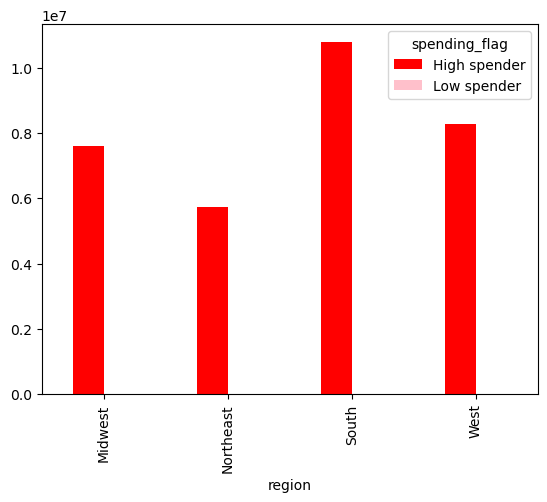

In [16]:
# create a bar graph for regional spending to visualize

region_spending_bar = region_spending_crosstab.sort_index().plot.bar(color = ['red', 'pink'])

##### The high spenders by region were ranked as follows:
1. South
2. West
3. Midwest
4. Northeast

The ranking makes sense since the top most populous states such as Texas (#2), Florida (#3), and California (#1) are found in the South and West regions, respectively. 

In [17]:
# export region_spending_bar

region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spending.png'))

### 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

In [18]:
# create a low-activity flag for 'max_order' < 5

df_orders_products_all.loc[df_orders_products_all['max_order']< 5, 'activity_flag'] = 'low-activity'

In [19]:
# create a high-activity flag for 'max_order' > 5

df_orders_products_all.loc[df_orders_products_all['max_order']>= 5, 'activity_flag'] = 'high-activity'

In [20]:
# checking the activity flag count

df_orders_products_all['activity_flag'].value_counts(dropna = False)

high-activity    30964564
low-activity      1440295
Name: activity_flag, dtype: int64

In [21]:
# create a subset dataframe that excludes the low-activity customers

df_orders_products_all_high_activity = df_orders_products_all.loc[df_orders_products_all['activity_flag'] == 'high-activity']

In [22]:
#check the new subset 

df_orders_products_all_high_activity.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,Gender,STATE,Age,date_joined,no_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity


In [23]:
# export subset df_orders_products_all_high_activity to pkl file

df_orders_products_all_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_orders_products_all_high_activity.pkl'))

### 5. Customer profiling

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

1. Age: Young Adult (18-25), Adult (26-44), Middle-age (45-59), Old-age (60 and above)
2. Income: Low Income (<52,000), Middle Income (52,000-156,600), High Income (>156,600)
3. Dietary: Carnivore, Vegetarian (no dept. 12 meat seafood), Vegan (no dept. 12 meat seafood and dept. 16 dairy eggs)
4. Number of dependants: No Children (0), Parent (>= 1)

In [24]:
df_orders_products_all_high_activity.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_prices,median_freq,Age,no_of_dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,1.193352e+01,3.442569e+01,4.224762e+02,2.521818e+01,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.913444e+02,2.489504e+01,4.666853e+03,6.760479e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,1.490000e+01,2.100000e+01,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,2.070000e+01,3.000000e+01,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,2.360000e+01,3.000000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,9.999900e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


#### 5.1 Age flag

In [25]:
df_orders_products_all.loc[df_orders_products_all['Age'] <= 25, 'age_flag'] = 'Young Adult'

In [26]:
df_orders_products_all.loc[(df_orders_products_all['Age'] <= 44) & (df_orders_products_all['Age'] >= 26), 'age_flag'] = 'Adult' 

In [27]:
df_orders_products_all.loc[(df_orders_products_all['Age'] <= 59) & (df_orders_products_all['Age'] >= 45), 'age_flag'] = 'Middle-Age' 

In [28]:
df_orders_products_all.loc[df_orders_products_all['Age'] >= 60, 'age_flag'] = 'Old-Age'

In [29]:
df_orders_products_all['age_flag'].value_counts(dropna = False)

Old-Age        11067255
Adult           9644895
Middle-Age      7647520
Young Adult     4045189
Name: age_flag, dtype: int64

#### 5.2 Income flag

In [30]:
df_orders_products_all.loc[df_orders_products_all['income'] <= 52000, 'income_flag'] = 'Low Income'

In [31]:
df_orders_products_all.loc[(df_orders_products_all['income'] <= 156600) & (df_orders_products_all['income'] >= 52001), 'income_flag'] = 'Middle Income' 

In [32]:
df_orders_products_all.loc[df_orders_products_all['income'] >= 156601, 'income_flag'] = 'High Income'

In [33]:
df_orders_products_all['income_flag'].value_counts(dropna = False)

Middle Income    25687671
Low Income        3879475
High Income       2837713
Name: income_flag, dtype: int64

#### 5.3 Dietary flag

In [34]:
# Create new column "Type"

df_orders_products_all['Type'] = df_orders_products_all.groupby('user_id')['department_id'].transform(lambda x: 'carnivore' if (x == 12).any() else 'vegetarian')


In [35]:
print(df_orders_products_all)

          order_id  user_id eval_set  order_number  orders_day_of_week  \
0          2539329        1    prior             1                   2   
1          2398795        1    prior             2                   3   
2           473747        1    prior             3                   3   
3          2254736        1    prior             4                   4   
4           431534        1    prior             5                   4   
...            ...      ...      ...           ...                 ...   
32404854    156685   106143    prior            26                   4   
32404855    484769    66343    prior             1                   6   
32404856   1561557    66343    prior             2                   1   
32404857    276317    66343    prior             3                   6   
32404858   2922475    66343    prior             4                   1   

          order_hour_of_day  days_since_prior_order  product_id  \
0                         8                 

In [61]:
df_orders_products_all['Type'].value_counts()

carnivore     23762619
vegetarian     8642240
Name: Type, dtype: int64

#### 5.4 Dependant flag

In [36]:
df_orders_products_all.loc[df_orders_products_all['no_of_dependants'] == 0, 'dependant_flag'] = 'No Children'

In [37]:
df_orders_products_all.loc[df_orders_products_all['no_of_dependants'] >0, 'dependant_flag'] = 'Parent'

In [38]:
df_orders_products_all['dependant_flag'].value_counts(dropna = False)

Parent         24307356
No Children     8097503
Name: dependant_flag, dtype: int64

### 6. Visualizations

#### 6.1 Age flag profile

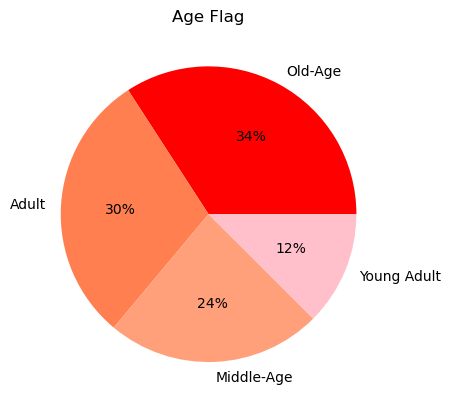

In [57]:
# create age_flag pie chart

age_flag_pie = df_orders_products_all['age_flag'].value_counts().plot.pie(title ='Age Flag', label = '', colors = ['red','coral','lightsalmon','pink'], autopct=('%1.f%%'))

In [59]:
# export age_flag pie chart

age_flag_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_flag_pie.png'))

##### Adults age 26-44 makes up the majority of Instacart's demographics.

#### 6.2 Income flag profile

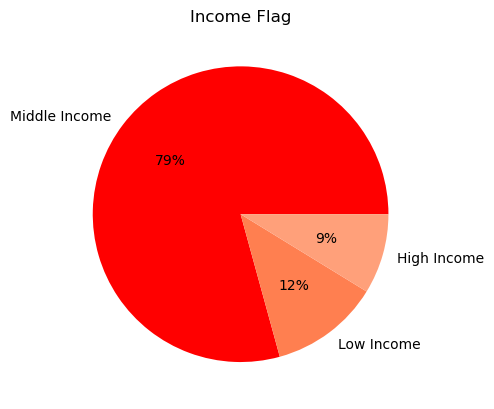

In [56]:
# create income_flag pie chart 

income_flag_pie = df_orders_products_all['income_flag'].value_counts().plot.pie(title ='Income Flag', label = '', colors = ['red','coral','lightsalmon'], autopct=('%1.f%%'))

##### Majority of Intacart's customers are middle class.

In [60]:
# export income_flag pie chart

income_flag_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_flag_pie.png'))

#### 6.3 Dietary flag profile

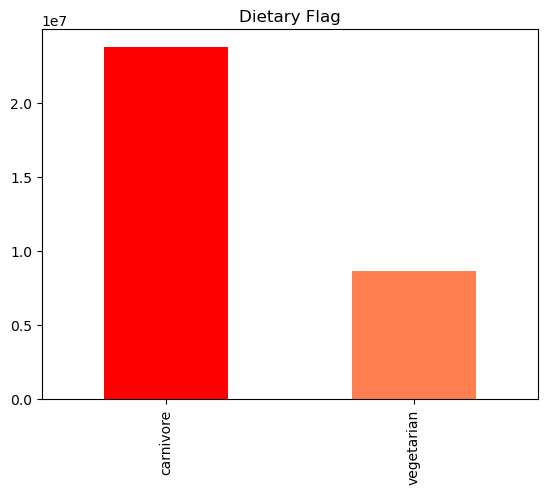

In [67]:
# create bar chart for dietary type flag

dietary_bar = df_orders_products_all['Type'].value_counts().plot.bar(title ='Dietary Flag', color = ['red', 'coral'])


In [69]:
# export dietary bar chart

dietary_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dietary_bar.png'))

##### Majority of Instacart's clients are carnivores. 

#### 6.4 Dependant flag profile

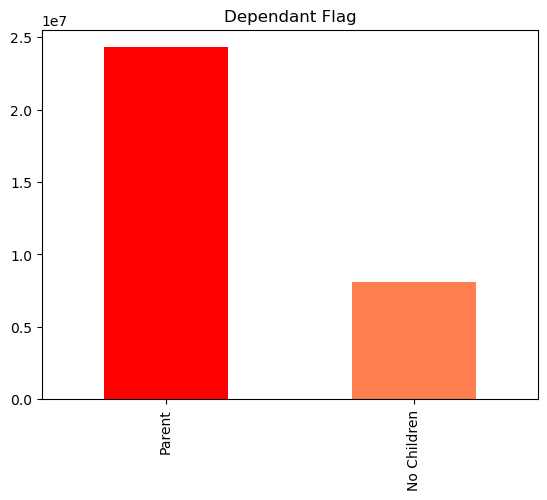

In [71]:
# create bar chart for dependant_flag profile

dependant_bar = df_orders_products_all['dependant_flag'].value_counts().plot.bar(title ='Dependant Flag', color = ['red', 'coral'])

In [72]:
# export dependant bar chart

dependant_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_bar.png'))

##### Majority of Instacart's clients have a child or more. 

### 7. Descriptive Statistics on All Profiles for Usage Frequency and Expenditures (mean, max, min)

#### 7.1 Age flag

In [73]:
# age_flag profile statistics by spend

df_orders_products_all.groupby('age_flag').agg({'prices' : ['mean', 'max', 'min']})

prices              
                  mean      max  min
age_flag                            
Adult        11.849466  99999.0  1.0
Middle-Age   12.355924  99999.0  1.0
Old-Age      11.763336  99999.0  1.0
Young Adult  12.175118  99999.0  1.0

In [74]:
# age_flag profile statistics by frequency

df_orders_products_all.groupby('age_flag').agg({'days_since_prior_order' : ['mean', 'max', 'min']})

days_since_prior_order           
                              mean   max  min
age_flag                                     
Adult                    11.113359  30.0  0.0
Middle-Age               11.114897  30.0  0.0
Old-Age                  11.092552  30.0  0.0
Young Adult              11.093030  30.0  0.0

#### 7.2 Income flag

In [75]:
# income_flag profile statistics by spend

df_orders_products_all.groupby('income_flag').agg({'prices' : ['mean', 'max', 'min']})

prices              
                    mean      max  min
income_flag                           
High Income    40.336168  99999.0  1.0
Low Income      6.741174     25.0  1.0
Middle Income   9.638976  99999.0  1.0

In [76]:
# income_flag profile statistics by frequency

df_orders_products_all.groupby('income_flag').agg({'days_since_prior_order' : ['mean', 'max', 'min']})

days_since_prior_order           
                                mean   max  min
income_flag                                    
High Income                10.914190  30.0  0.0
Low Income                 11.569561  30.0  0.0
Middle Income              11.055509  30.0  0.0

#### 7.4 Dietary flag

In [77]:
# dietary_flag profile statistics by spend

df_orders_products_all.groupby('Type').agg({'prices' : ['mean', 'max', 'min']})

prices              
                 mean      max  min
Type                               
carnivore   12.042126  99999.0  1.0
vegetarian  11.810025  99999.0  1.0

In [78]:
# dietary_flag profile statistics by frequency

df_orders_products_all.groupby('Type').agg({'days_since_prior_order' : ['mean', 'max', 'min']})

days_since_prior_order           
                             mean   max  min
Type                                        
carnivore               10.762605  30.0  0.0
vegetarian              12.071076  30.0  0.0

#### 7.4 Dependant flag

In [79]:
# dependant_flag profile statistics by spend

df_orders_products_all.groupby('dependant_flag').agg({'prices' : ['mean', 'max', 'min']})

prices              
                     mean      max  min
dependant_flag                         
No Children     12.129243  99999.0  1.0
Parent          11.930584  99999.0  1.0

In [80]:
# dependant_flag profile statistics by frequency

df_orders_products_all.groupby('dependant_flag').agg({'days_since_prior_order' : ['mean', 'max', 'min']})

days_since_prior_order           
                                 mean   max  min
dependant_flag                                  
No Children                 11.080805  30.0  0.0
Parent                      11.111834  30.0  0.0

### 8. Comparing profiles with regions and departments

In [89]:
# create crosstab between age_flag and departments

crosstab_age_flag_departments = pd.crosstab(df_orders_products_all['department_id'], df_orders_products_all['age_flag'], dropna = False)

In [90]:
cmap = plt.colormaps['autumn']

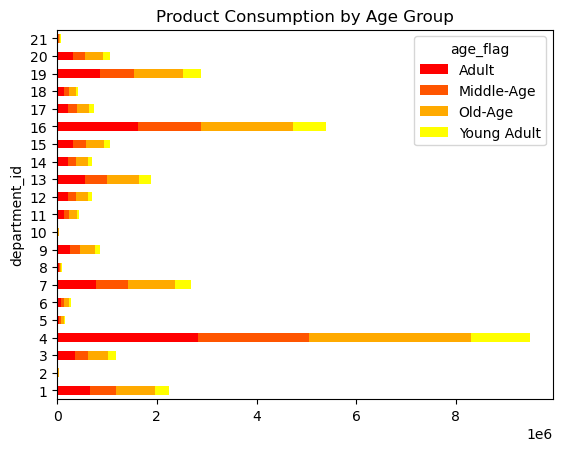

In [101]:
# create stacked bar chart for department_id and age_flag

age_depts_bar = crosstab_age_flag_departments.plot(kind = 'barh', stacked = True, title = 'Product Consumption by Age Group', cmap = cmap, xlabel = '')


In [93]:
# export Product Consumption by Age Group bar chart

age_depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_age_bar.png'))

##### Produce is the #1 consumed product across all age groups, followed by dairy and eggs. 

In [95]:
# create crosstab between income_flag and region

crosstab_income_flag_regions = pd.crosstab(df_orders_products_all['region'], df_orders_products_all['income_flag'], dropna = False)

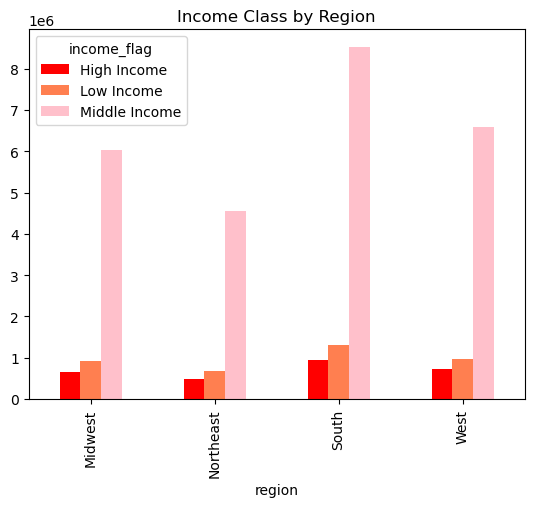

In [102]:
# create bar chart for income_flag and region

income_region_bar = crosstab_income_flag_regions.plot.bar(title ='Income Class by Region', color = ['red', 'coral', 'pink'])

##### Majority of the consumers across regions belong in the middle class income bracket and are responsible for driving up sales.

In [103]:
# export Income Class by Region bar chart

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'))

In [104]:
# create crosstab between dependant_flag and region

crosstab_dependant_flag_regions = pd.crosstab(df_orders_products_all['region'], df_orders_products_all['dependant_flag'], dropna = False)

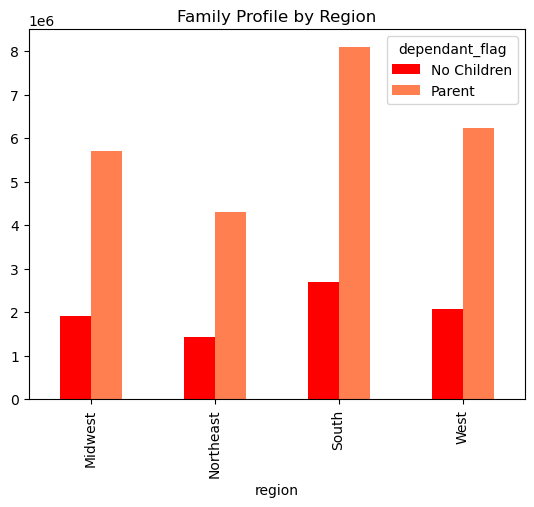

In [111]:
# create bar chart for income_flag and region

dependant_region_bar = crosstab_dependant_flag_regions.plot.bar(title ='Family Profile by Region', color = ['red', 'coral',])

##### Customers with children drive up sales across all regions given that more household members will be consuming groceries. Parents are consistenly higher compared to people with no children across all regions.

In [107]:
# export Family Profile by Region bar chart

dependant_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_region_bar.png'))

In [108]:
# create crosstab between dietary Type and region

crosstab_type_regions = pd.crosstab(df_orders_products_all['region'], df_orders_products_all['Type'], dropna = False)

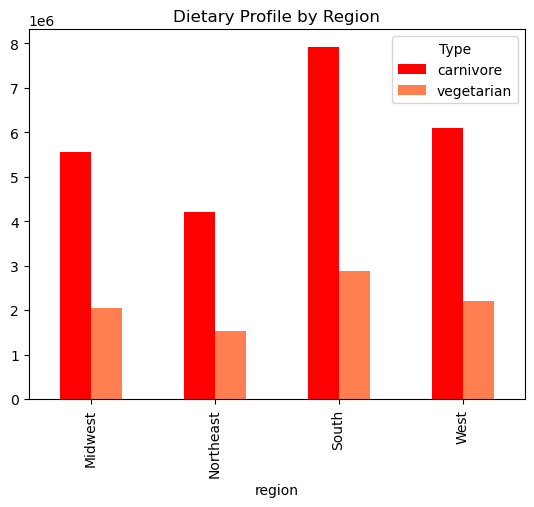

In [110]:
# create bar chart for dietary Type and region

dietary_region_bar = crosstab_type_regions.plot.bar(title ='Dietary Profile by Region', color = ['red', 'coral'])

###### While the carnivores outnumber the vegetarians across regions, it should be noted that the South and West regions had the most vegetarian clientels. 

In [112]:
# export Dietary Profile by Region bar chart

dietary_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dietary_region_bar.png'))

In [114]:
# export dataframe as a pickle file

df_orders_products_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','df_orders_products_all_final.pkl'))